## Метод Лакса-Вендроффа

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [43]:
A = -1; B = 1; T = 0.5   # границы
h = 0.05; tau = 0.0025     # размеры шага по времени и координате
M = int ((B-A)/h)# количество узлов по координате
N = int(T / tau)              # количество узлов по времени
u1 = np.linspace(A, B, M+1)
u2 = np.linspace(0,0,M+1)
x = np.linspace(A, B, M+1)
nu = .0

In [44]:
def Gauss(x, mu, sigma):
    return math.exp((-(x-mu)**2)/(2*sigma**2))

In [45]:
mu = 0
sigma = .2

In [46]:
for i in range(M+1):
    u1[i] = Gauss(x[i], mu, sigma)
u0 = u1.copy() 

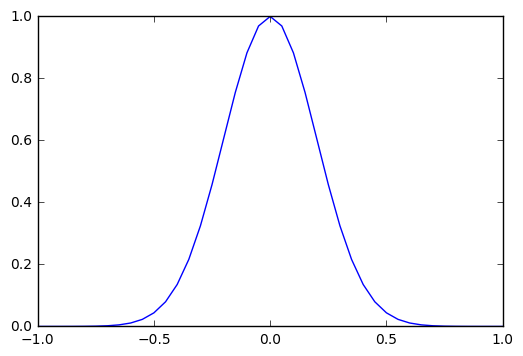

In [47]:
plt.plot(x, u0)

In [48]:
u1[0] = u1[M] = 0

In [49]:
cou1 = np.abs(u1).max() * tau / h
cou2 = nu * tau / h**2
print 'Hyperbolic Courant:', cou1, 'Parabolic Courant:', cou2

Hyperbolic Courant: 0.05 Parabolic Courant: 0.0


In [50]:
for i in range(N):
    for j in range(1, M):
        p1 = ((u1[j]) ** 2 - (u1[j+1]) ** 2) * tau / 8 + 0.5 * (u1[j+1] + u1[j])
        p2 = ((u1[j]) ** 2 - (u1[j+1]) ** 2) * tau / 8 + 0.5 * (u1[j+1] - u1[j])
        u2[j] = u1[j] + nu / (h ** 2) * (u1[j+1] - 2 * u1[j] + u1[j-1]) + tau / (h * 2) * (p1 ** 2 - p2 ** 2)
    u2, u1 = u1, u2

In [41]:
u1 # при nu = .1

array([  0.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,   0.])

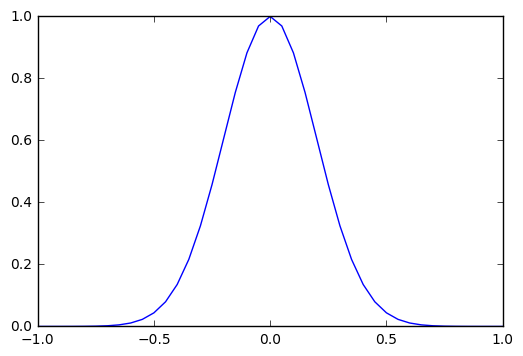

In [42]:
plt.plot(x, u0)
plt.plot(x, u2) # при nu = .1

In [51]:
u1 # при nu = 0

array([  0.00000000e+00,   1.26096317e-05,   4.00892862e-05,
         1.19814123e-04,   3.36956546e-04,   8.93673000e-04,
         2.24549784e-03,   5.39279255e-03,   1.21908648e-02,
         1.06505767e-02,  -2.30727274e-01,  -7.78844529e+32,
        -6.52441307e+36,  -8.06420251e+02,   1.20826174e+20,
        -5.75513373e+32,  -2.33009514e+37,   1.37637405e+38,
         1.39140778e+31,   1.40089703e+27,   2.24002962e+30,
         2.89090690e+33,   8.00503167e+30,   3.38099751e+27,
         3.53166433e+20,   1.80751922e+01,   1.66782380e+00,
         5.02463548e-01,   2.11441501e-01,   1.00410342e-01,
         4.93991267e-02,   2.41130923e-02,   1.13966948e-02,
         5.14212591e-03,   2.19718735e-03,   8.85310442e-04,
         3.35663336e-04,   1.19636848e-04,   4.00678230e-05,
         1.26071052e-05,   0.00000000e+00])

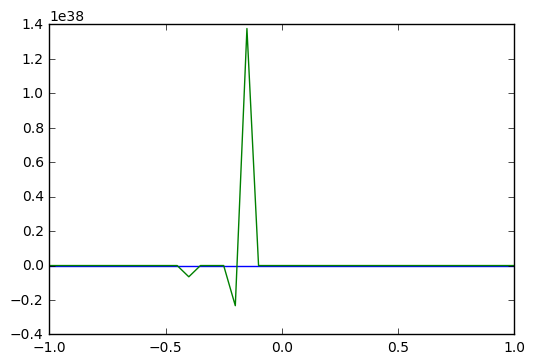

In [52]:
plt.plot(x, u0)
plt.plot(x, u2) # при nu = 0